In [60]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import math

In [22]:
data = pd.read_csv("./BMW sales data (2010-2024) (1).csv")

## Step 1: Data DEFINE - Are we Solving the Right Problem? 

In [25]:
# start with these list of questions: 

# 1.) How much did each model sell, each year? 2013 to 2024?

# 2.) How were model sales in each location? How about over each year? 
# 3.) which Models gave attributed most to revenue? 
# 4.) specific features- which features were seem to be most repeated during most sold cars? 


# Split up analysis: Create one descriptive analysis, that explains:
# 1.) best sellers/worst sellers, 2.) Geographically best sellers 3.) What color sold the most? Fuel type 

# THEN, Lets build a predictive model, which factors in relevant features, which will predict if sales classification will be high or low 



#### 1.a) How much did each model sell, from 2013 to 2024? 

In [68]:
data.sort_values('Year', ascending=True)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
21862,X3,2010,Asia,Grey,Diesel,Automatic,1.6,183771,114390,282,Low
12760,X3,2010,Middle East,Grey,Hybrid,Manual,1.8,28776,88327,4330,Low
33482,5 Series,2010,Europe,White,Petrol,Automatic,4.2,113518,70392,1929,Low
12753,7 Series,2010,Africa,Grey,Diesel,Manual,3.1,108649,47035,356,Low
3318,i3,2010,Africa,White,Diesel,Manual,3.9,33026,61498,5649,Low
...,...,...,...,...,...,...,...,...,...,...,...
46057,3 Series,2024,Asia,White,Electric,Manual,4.1,102284,84965,9485,High
30110,i3,2024,Asia,Black,Hybrid,Automatic,4.2,15037,107290,3689,Low
15397,M5,2024,Europe,White,Diesel,Manual,4.5,145008,52079,2621,Low
14064,X6,2024,Africa,White,Hybrid,Automatic,4.4,127612,72760,4381,Low


In [30]:
# exploring data

data.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [32]:
print(data.info())
print('\n')
print('Need to convert objects into categorical variables')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None


Need to convert objects into categorical variables


In [34]:
print(data.isna().any())
print('no missing data')

Model                   False
Year                    False
Region                  False
Color                   False
Fuel_Type               False
Transmission            False
Engine_Size_L           False
Mileage_KM              False
Price_USD               False
Sales_Volume            False
Sales_Classification    False
dtype: bool
no missing data


In [36]:
pd.Series(data['Year'].unique()).sort_values(ascending = True)

13    2010
10    2011
8     2012
1     2013
6     2014
9     2015
0     2016
5     2017
14    2018
7     2019
4     2020
11    2021
2     2022
12    2023
3     2024
dtype: int64

In [38]:
# Grouping Sales Volume per model, per year. Will ignore geography for now
modelsales_volume = data.groupby(['Model','Year'], as_index=False)['Sales_Volume'].sum().sort_values(by=['Model','Year'])

In [40]:
print(modelsales_volume.head())
print(modelsales_volume.shape)

      Model  Year  Sales_Volume
0  3 Series  2010       1647769
1  3 Series  2011       1473102
2  3 Series  2012       1378152
3  3 Series  2013       1448530
4  3 Series  2014       1682545
(165, 3)


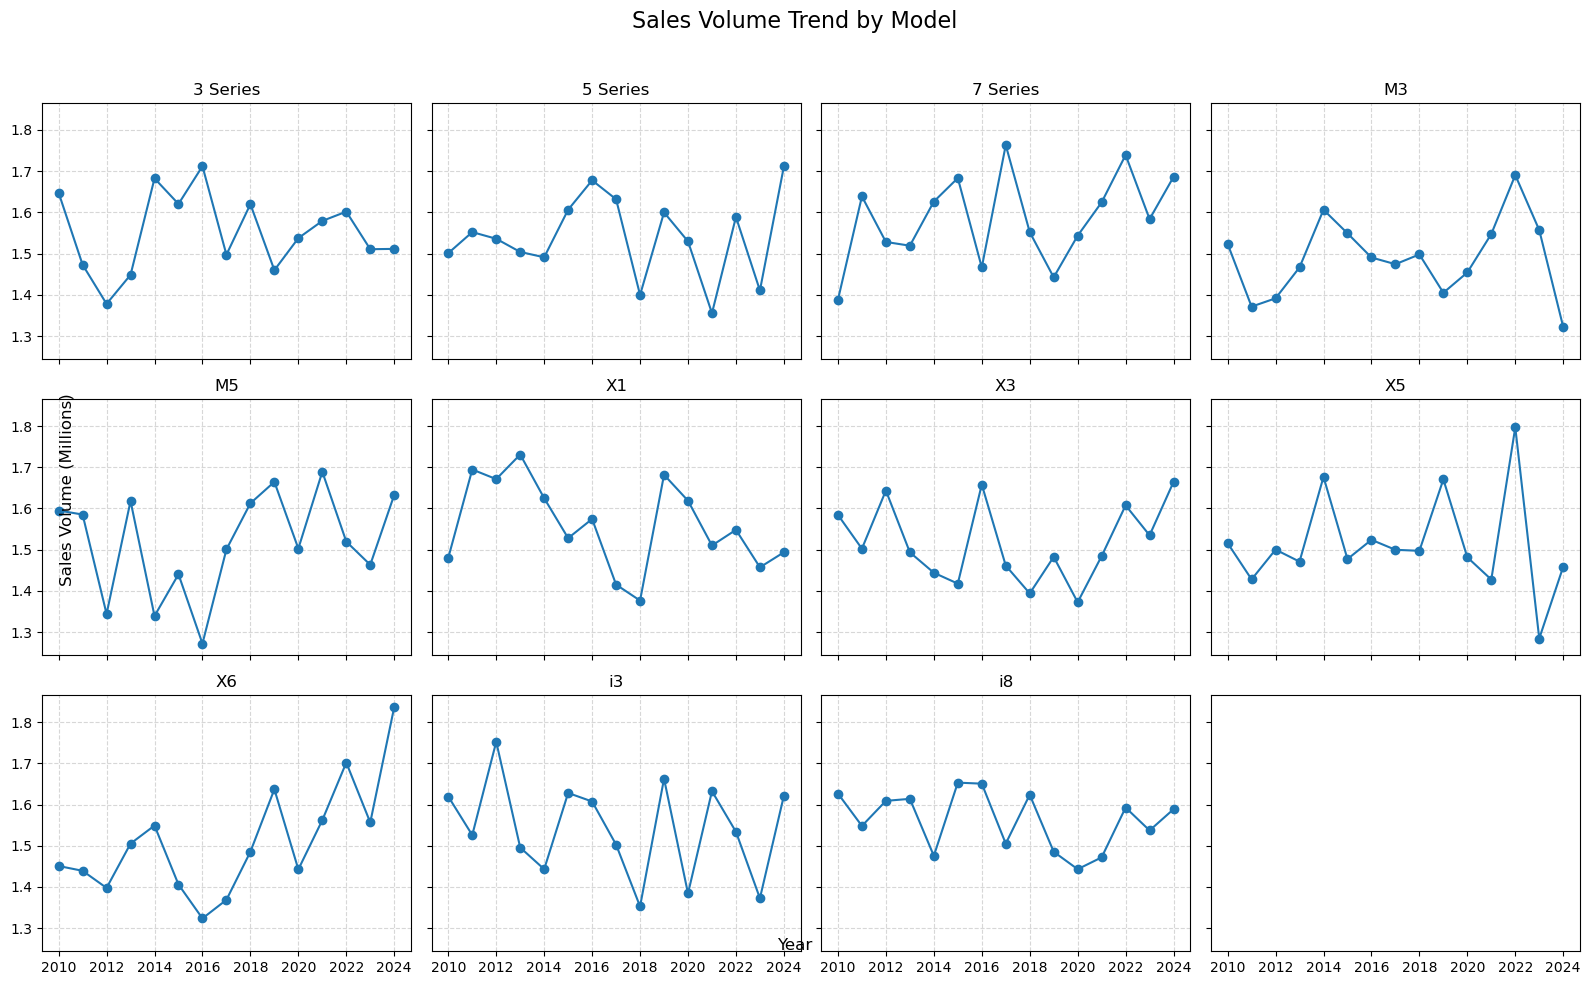

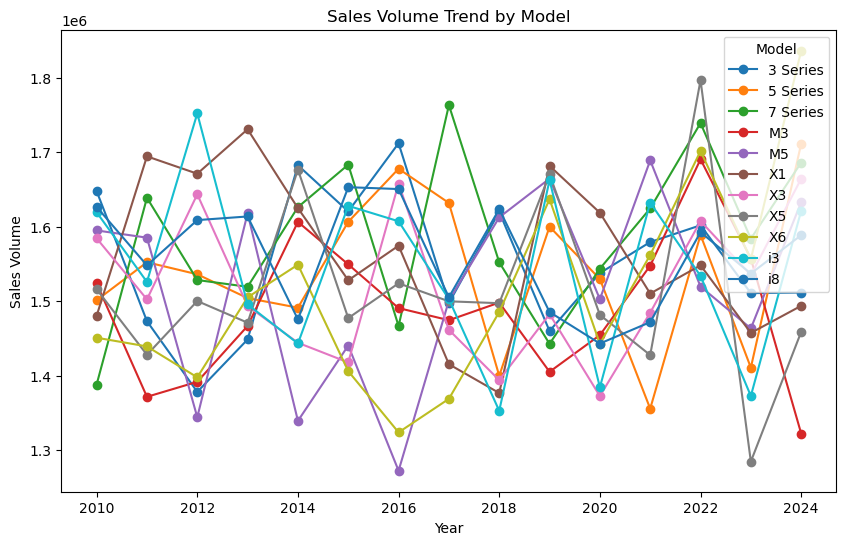

In [62]:
# Number of unique models
models = modelsales_volume['Model'].unique()
n_models = len(models)

# Define grid size (e.g., 3 rows × 4 cols for 11 models)
n_cols = 4
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten axes array for easy indexing

for i, model_name in enumerate(models):
    ax = axes[i]
    group = modelsales_volume[modelsales_volume['Model'] == model_name].sort_values('Year')
    ax.plot(group['Year'], group['Sales_Volume'] / 1_000_000, marker='o', color='tab:blue')
    ax.set_title(model_name)
    ax.grid(True, linestyle='--', alpha=0.5)

# Label only outer plots
for ax in axes:
    ax.label_outer()

# Common labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Sales Volume (Millions)', va='center', rotation='vertical', fontsize=12)

fig.suptitle('Sales Volume Trend by Model', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print('\n')
# Initalize figure 
fig, ax = plt.subplots(figsize = (10,6))

for model_name, group in modelsales_volume.groupby('Model'):
    ax.plot(group['Year'], group['Sales_Volume'], marker='o', label=model_name)

ax.set_xlabel('Year')
ax.set_ylabel('Sales Volume')
ax.set_title('Sales Volume Trend by Model')
ax.legend(title='Model')
plt.show()

###  From Analyzing the trends, it appears X6 is growing the most in the recent years, and models such as M3 and X1 started falling. X1 possibly is faling due to the rise in popularity in X6, and M3 is falling perhaps to a preference to SUVs. 

<Axes: xlabel='Year', ylabel='Sales_Volume'>

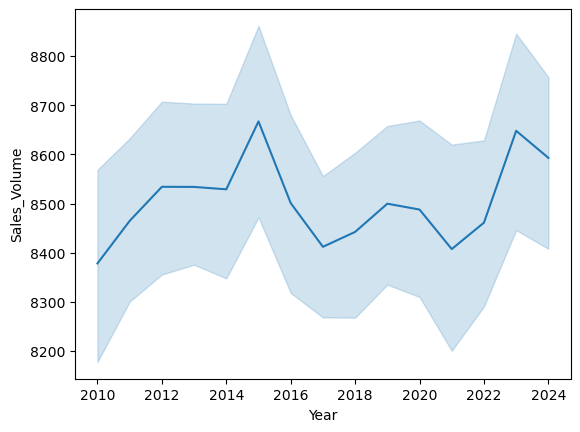

In [46]:
# 3.) which Models had the highest sales volume, over the years?

# Grouping Revenue and Sales classification  per model, per year.

sales_class = data[data['Sales_Classification'] == 'High']
sales_class

plt.figure()
sns.lineplot(
    data=sales_class[sales_class['Model'] == '5 Series'],
    x="Year",
    y=sales_class["Sales_Volume"]
)


In [48]:
# 2.) How were model sales in each location? How about over each year?

# Grouping Sales Volume per region, per year
regionsales_volume = data.groupby(['Region','Year'], as_index=False)['Sales_Volume'].sum().sort_values(by=['Region','Year'])

In [50]:
regionsales_volume.head()

,Region,Year,Sales_Volume
0,Africa,2010,2855044
1,Africa,2011,2760743
2,Africa,2012,2670105
3,Africa,2013,2848852
4,Africa,2014,2743718


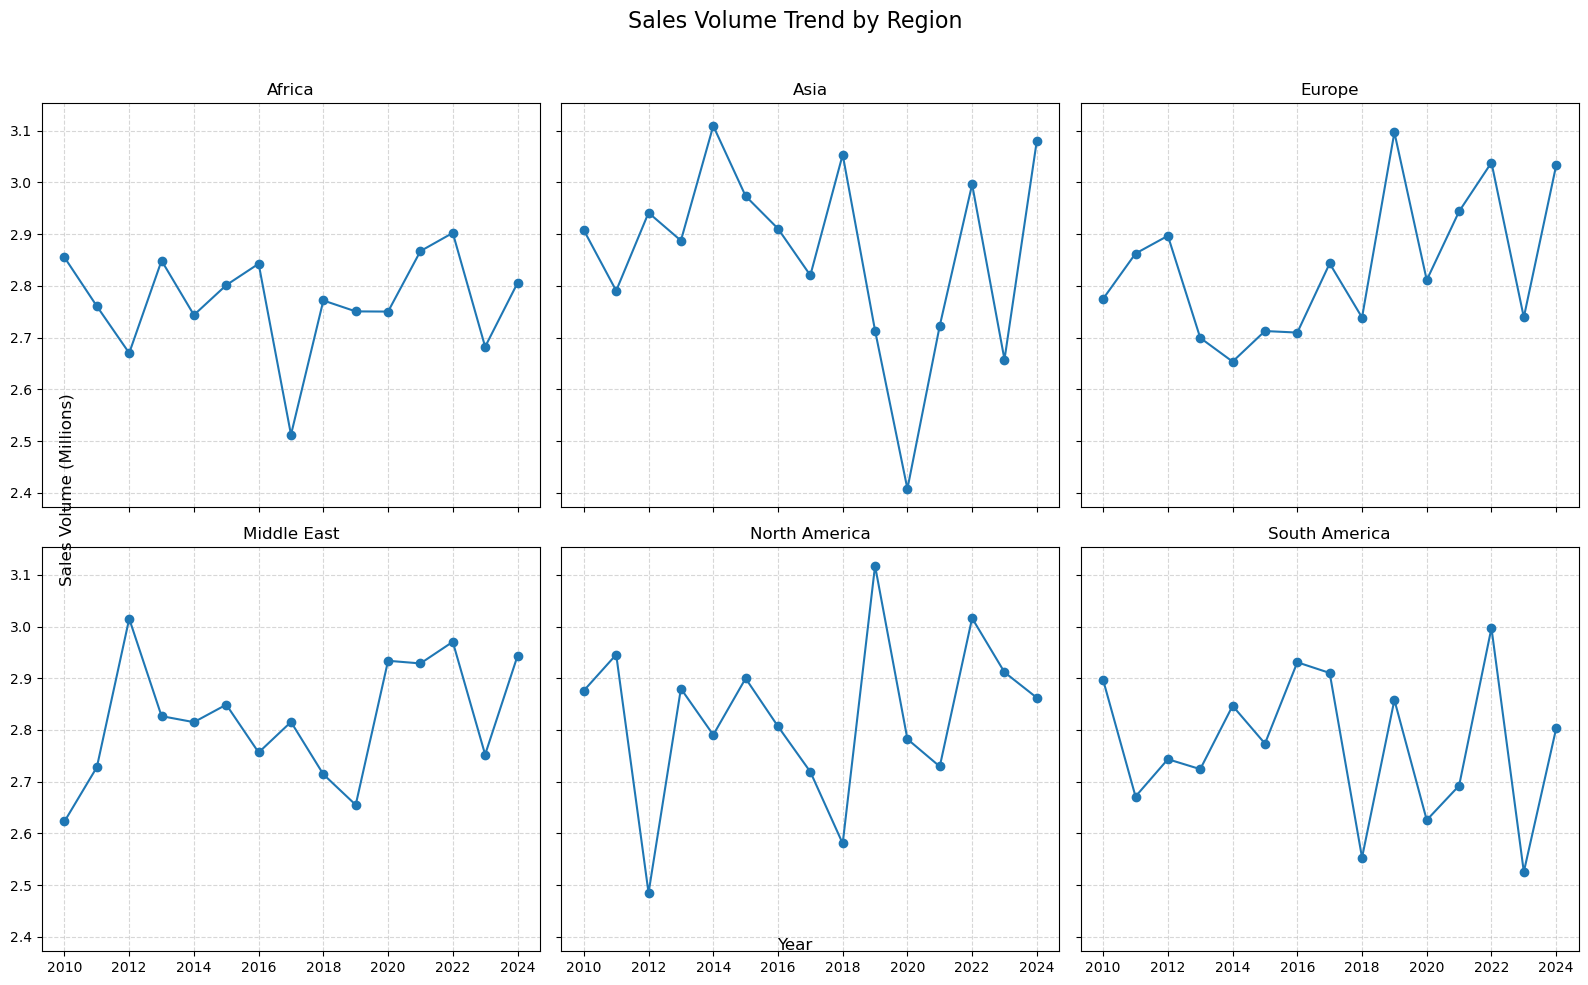

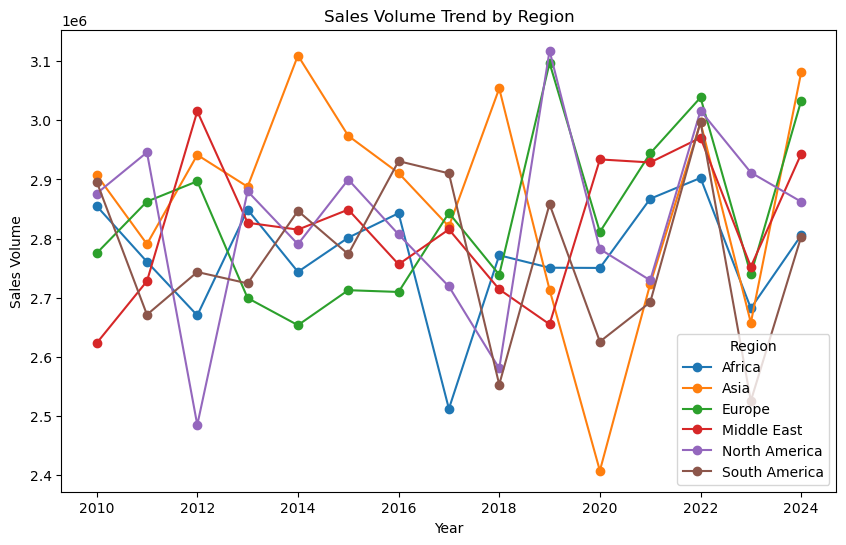

In [64]:
# Number of unique models
models = regionsales_volume['Region'].unique()
n_models = len(models)

# Define grid size (e.g., 3 rows × 4 cols for 11 models)
n_cols = 3
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten axes array for easy indexing

for i, model_name in enumerate(models):
    ax = axes[i]
    group = regionsales_volume[regionsales_volume['Region'] == model_name].sort_values('Year')
    ax.plot(group['Year'], group['Sales_Volume'] / 1_000_000, marker='o', color='tab:blue')
    ax.set_title(model_name)
    ax.grid(True, linestyle='--', alpha=0.5)

# Label only outer plots
for ax in axes:
    ax.label_outer()

# Common labels
fig.text(0.5, 0.04, 'Year', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Sales Volume (Millions)', va='center', rotation='vertical', fontsize=12)

fig.suptitle('Sales Volume Trend by Region', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print('\n')
# Initalize figure 
fig, ax = plt.subplots(figsize = (10,6))

for model_name, group in regionsales_volume.groupby('Region'):
    ax.plot(group['Year'], group['Sales_Volume'], marker='o', label=model_name)

ax.set_xlabel('Year')
ax.set_ylabel('Sales Volume')
ax.set_title('Sales Volume Trend by Region')
ax.legend(title='Region')
plt.show()

### Although Cyclical, I see a growth pattern in North America, with peaks, pushing to new volumes. This is expected to the sensitivity of car sales when compared to economic conditions, interest rates, and etc. 



### ML ModeL

In [127]:
# Creating classification model that will predict whether a model will be classified as high or low in Sales, based on Features


# Step 1: Convert Datatypes that are objects into ML Friendly format 

print(list(data.select_dtypes(include='object').columns))
print('\n')
print(data.select_dtypes(include='object').head())

# Copying dataset to maintain source data
data2 = data.copy()
print('\n')

# Create and fit the label encoder
label_encoder = LabelEncoder()
data2['Region_coded'] = label_encoder.fit_transform(data2['Region'])

# Create a readable dictionary mapping
region_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the mapping
print("Region Encoding Dictionary:")
for region, code in region_mapping.items():
    print(f"{region}: {code}")

# Preview the updated DataFrame
data2.head()



['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']


      Model         Region  Color Fuel_Type Transmission Sales_Classification
0  5 Series           Asia    Red    Petrol       Manual                 High
1        i8  North America    Red    Hybrid    Automatic                  Low
2  5 Series  North America   Blue    Petrol    Automatic                  Low
3        X3    Middle East   Blue    Petrol    Automatic                  Low
4  7 Series  South America  Black    Diesel       Manual                  Low


Region Encoding Dictionary:
Africa: 0
Asia: 1
Europe: 2
Middle East: 3
North America: 4
South America: 5


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Region_coded
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,1
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,4
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,4
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,3
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5


In [117]:
data2['Color_coded'] = label_encoder.fit_transform(data2['Color'])
data2['Fuel_Type_coded'] = label_encoder.fit_transform(data2['Fuel_Type'])
data2['Transmission_coded'] = label_encoder.fit_transform(data2['Transmission'])


data2.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Region_coded,Color_coded,Fuel_Type_coded,Transmission_coded
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,1,3,3,1
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,4,3,2,0
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,4,1,3,0
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,3,1,3,0
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5,0,0,1


In [123]:
data_clean = data2.copy()
data_clean.drop(['Region','Color','Fuel_Type','Transmission'])
data_clean

KeyError: "['Region', 'Color', 'Fuel_Type', 'Transmission'] not found in axis"

In [125]:
data_clean

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Region_coded,Color_coded,Fuel_Type_coded,Transmission_coded
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,1,3,3,1
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,4,3,2,0
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,4,1,3,0
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,3,1,3,0
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,1,3,2,1
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,3,4,1,1
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High,3,3,3,0
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High,1,5,1,0


## Step 2: Data Discover - What Data do we need?

## Step 3: Data Exploration - What does the data tell us? (We create summary stats and inital visuals to explain to stakeholders

### Data tells us how each car model behaves in each region, and how the volumes are

## Step 4: Analyze - What type of analytics will solve the problem?

In [ ]:
### Lets create a ML model, that will predict, whether a car model will be classified as high or low






## Step 5: Communicate findings to stakeholders: remember Situation, complicaiton, Resolution

## Step 6: Operationalize: Put Solution into Production